# DeOldify on Colab #

This notebook shows how to get your own version of [DeOldify](https://github.com/jantic/DeOldify) working on Google Colab. A lot of the initial steps are just installs -- but these are also the steps that can make running the model a tedious exercise.

Initially, one must `pip install` a few dependencies, then `wget` is used to download the appropriate picture data.

NECESSARY PRELIMINARY STEP: Please make sure you have gone up to the "Runtime" menu above and "Change Runtime Type" to Python3 and GPU.

I hope you have fun, and thanks to Jason Antic for this awesome tool!

-Matt Robinson, <matthew67robinson@gmail.com>

NEW: You can now load your files from you own Google Drive, check the last cell of the notebook for more information.

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 957 (delta 1), reused 9 (delta 0), pack-reused 943
Receiving objects: 100% (957/957), 68.40 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (288/288), done.


In [2]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x57028000 @  0x7f7d85d742a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
0.4.1
True


In [3]:
cd DeOldify

/content/DeOldify


In [4]:
!pip install -e .

Obtaining file:///content/DeOldify
    100% |████████████████████████████████| 1.5MB 11.6MB/s 
    100% |████████████████████████████████| 184kB 21.8MB/s 
    100% |████████████████████████████████| 3.6MB 8.6MB/s 
    100% |████████████████████████████████| 133kB 27.1MB/s 
    100% |████████████████████████████████| 71kB 24.0MB/s 
    100% |████████████████████████████████| 11.6MB 1.1MB/s 
    100% |████████████████████████████████| 92kB 21.9MB/s 
    100% |████████████████████████████████| 61kB 9.0MB/s 
    100% |████████████████████████████████| 81kB 23.9MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
# Doing work so I can access data from my google drive
!pip install PyDrive

    100% |████████████████████████████████| 993kB 16.7MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [7]:
# Work around with Pillow being preinstalled on these Colab VMs, causing conflicts otherwise.
!pip install Pillow==4.1.1

    100% |████████████████████████████████| 5.7MB 6.0MB/s 
  Found existing installation: Pillow 5.4.0
    Uninstalling Pillow-5.4.0:
      Successfully uninstalled Pillow-5.4.0


In [8]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import multiprocessing
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.training import *
from fasterai.generators import *
from fastai.torch_imports import *
from fasterai.filters import *
from pathlib import Path
from itertools import repeat
from google.colab import drive
from IPython.display import Image
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:74: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: The _imaging extension was built for another version of Pillow or PIL
]


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Note that the above requires a verification step. It isn't too bad.

In [0]:
# Now download the pretrained weights, which I have saved to my google drive
# note that the id is the ending part of the shareable link url (after open?id=)
# The pretrained weights can be downloaded from https://www.dropbox.com/s/7r2wu0af6okv280/colorize_gen_192.h5
download = drive.CreateFile({'id': '1mRRvS3WIHPdp36G0yc1jC0XI6i-Narv6'})
download.GetContentFile('pretrained_weights.h5')

With access to your Google Drive, the "deOldifyImages" directory will be created. Drop there your personal images, and after the full execution of the notebook find the results at its subdirectory "results"

In [11]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir "/content/drive/My Drive/deOldifyImages"
!mkdir "/content/drive/My Drive/deOldifyImages/results"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
weights_path = 'pretrained_weights.h5'
results_dir='/content/drive/My Drive/deOldifyImages/results'

#The higher the render_factor, the more GPU memory will be used and generally images will look better.  
#11GB can take a factor of 42 max.  Performance generally gracefully degrades with lower factors, 
#though you may also find that certain images will actually render better at lower numbers.  
#This tends to be the case with the oldest photos.
render_factor=42
filters = [Colorizer34(gpu=0, weights_path=weights_path)]
vis = ModelImageVisualizer(filters, render_factor=render_factor, results_dir=results_dir)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 23338302.49it/s]


In [13]:
# download an example picture to try.
# NOTE: All the jpg files cloned from the git repo are corrupted. Must download yourself.
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg" -O "abe2.jpg"

--2019-01-04 07:26:54--  https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13981 (14K) [image/jpeg]
Saving to: ‘abe2.jpg’

abe2.jpg            100%[===================>]  13.65K  --.-KB/s    in 0.007s  

2019-01-04 07:26:55 (1.94 MB/s) - ‘abe2.jpg’ saved [13981/13981]



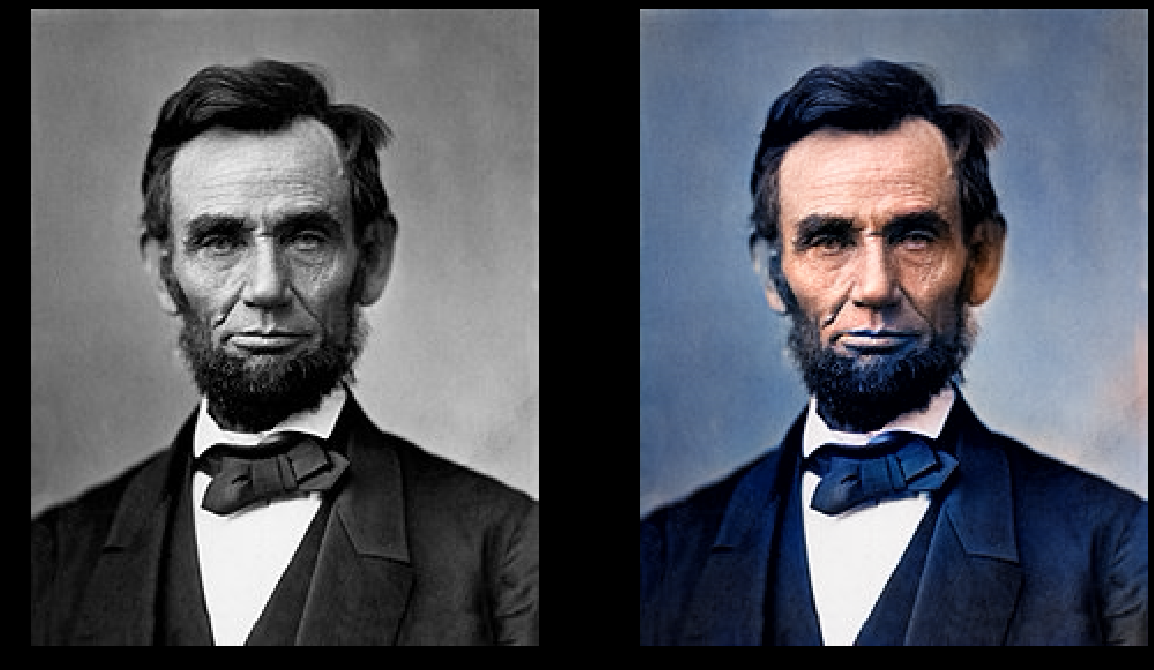

In [14]:
# %matplotlib inline
vis.plot_transformed_image('abe2.jpg', render_factor=25)

In [15]:
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg" -O "family_TV.jpg"

--2019-01-04 07:27:18--  https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88662 (87K) [image/jpeg]
Saving to: ‘family_TV.jpg’

family_TV.jpg       100%[===================>]  86.58K  --.-KB/s    in 0.01s   

2019-01-04 07:27:19 (5.81 MB/s) - ‘family_TV.jpg’ saved [88662/88662]



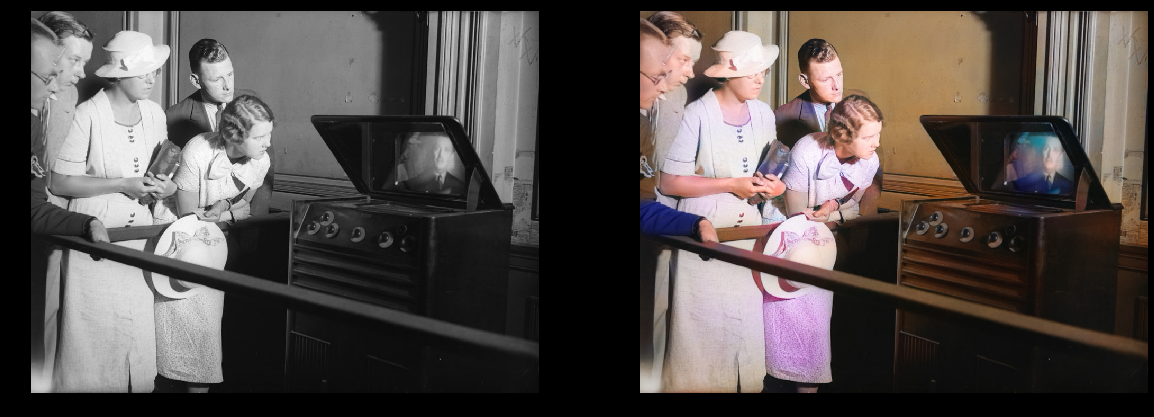

In [16]:
vis.plot_transformed_image('family_TV.jpg', render_factor=41)

Let's see how well it does Dorothy before her world turns to color in the Wizard of Oz:

In [17]:
!wget "https://magnoliaforever.files.wordpress.com/2011/09/wizard-of-oz.jpg" -O "Dorothy.jpg"

--2019-01-04 07:27:41--  https://magnoliaforever.files.wordpress.com/2011/09/wizard-of-oz.jpg
Resolving magnoliaforever.files.wordpress.com (magnoliaforever.files.wordpress.com)... 192.0.72.16, 192.0.72.17
Connecting to magnoliaforever.files.wordpress.com (magnoliaforever.files.wordpress.com)|192.0.72.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84039 (82K) [image/jpeg]
Saving to: ‘Dorothy.jpg’

Dorothy.jpg         100%[===================>]  82.07K  --.-KB/s    in 0.06s   

2019-01-04 07:27:41 (1.38 MB/s) - ‘Dorothy.jpg’ saved [84039/84039]



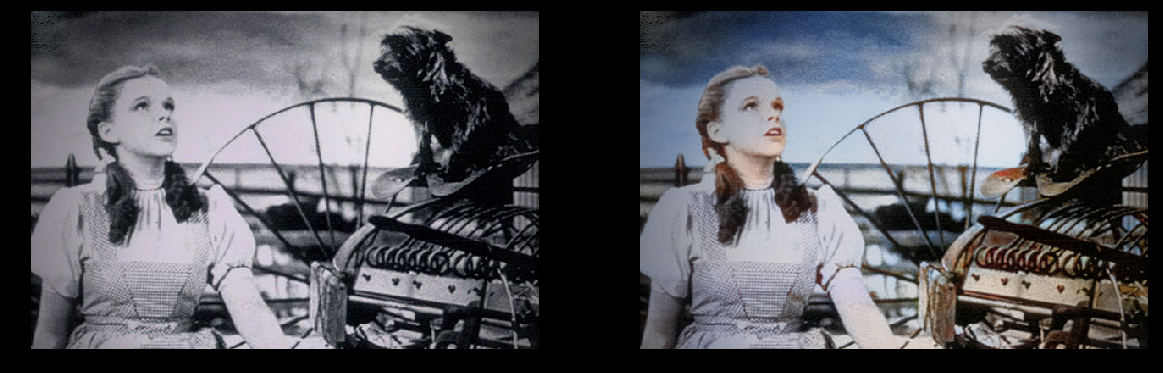

In [18]:
vis.plot_transformed_image('Dorothy.jpg', render_factor=30)

Let's now try Butch and Sundance. Famously the last scene ends with a black and white still. So we know what the color was beforehand.

In [19]:
!wget "https://i.ebayimg.com/images/g/HqkAAOSwRLZUAwyS/s-l300.jpg" -O "butch_and_sundance.jpg"

--2019-01-04 07:28:00--  https://i.ebayimg.com/images/g/HqkAAOSwRLZUAwyS/s-l300.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 23.44.160.209, 2600:1406:1a:395::24d4, 2600:1406:1a:3a3::24d4
Connecting to i.ebayimg.com (i.ebayimg.com)|23.44.160.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19247 (19K) [image/jpeg]
Saving to: ‘butch_and_sundance.jpg’

butch_and_sundance. 100%[===================>]  18.80K  --.-KB/s    in 0s      

2019-01-04 07:28:01 (108 MB/s) - ‘butch_and_sundance.jpg’ saved [19247/19247]



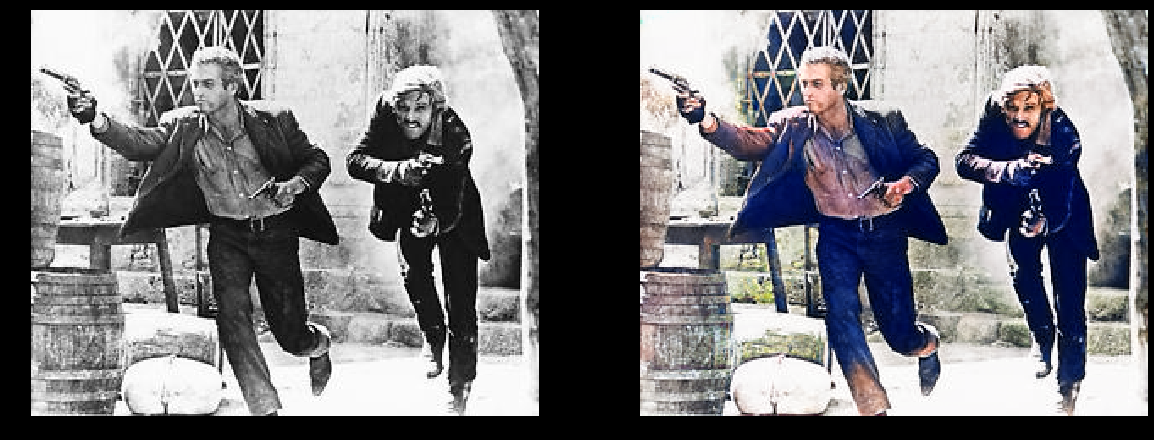

In [20]:
vis.plot_transformed_image('butch_and_sundance.jpg', render_factor=29)

Let's get a picture of what they were actually wearing:

In [21]:
!wget "https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg" -O "butch_and_sundance_color.jpg"

--2019-01-04 07:28:06--  https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg
Resolving bethanytompkins.files.wordpress.com (bethanytompkins.files.wordpress.com)... 192.0.72.16, 192.0.72.17
Connecting to bethanytompkins.files.wordpress.com (bethanytompkins.files.wordpress.com)|192.0.72.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37162 (36K) [image/jpeg]
Saving to: ‘butch_and_sundance_color.jpg’

butch_and_sundance_ 100%[===================>]  36.29K  --.-KB/s    in 0.03s   

2019-01-04 07:28:06 (1.22 MB/s) - ‘butch_and_sundance_color.jpg’ saved [37162/37162]



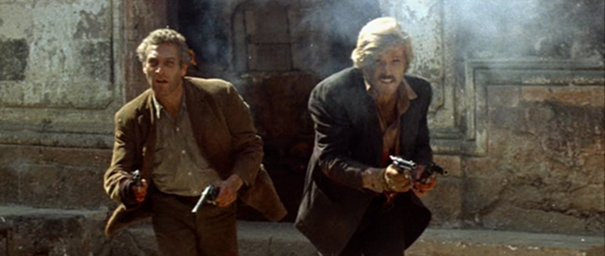

In [22]:
Image('butch_and_sundance_color.jpg')

If you want to colorise pictures from your drive, drop them in a directory named deOldifyImages (in the root of your drive) and the next cell will save the colorise pictures in deOldifyImages/results.

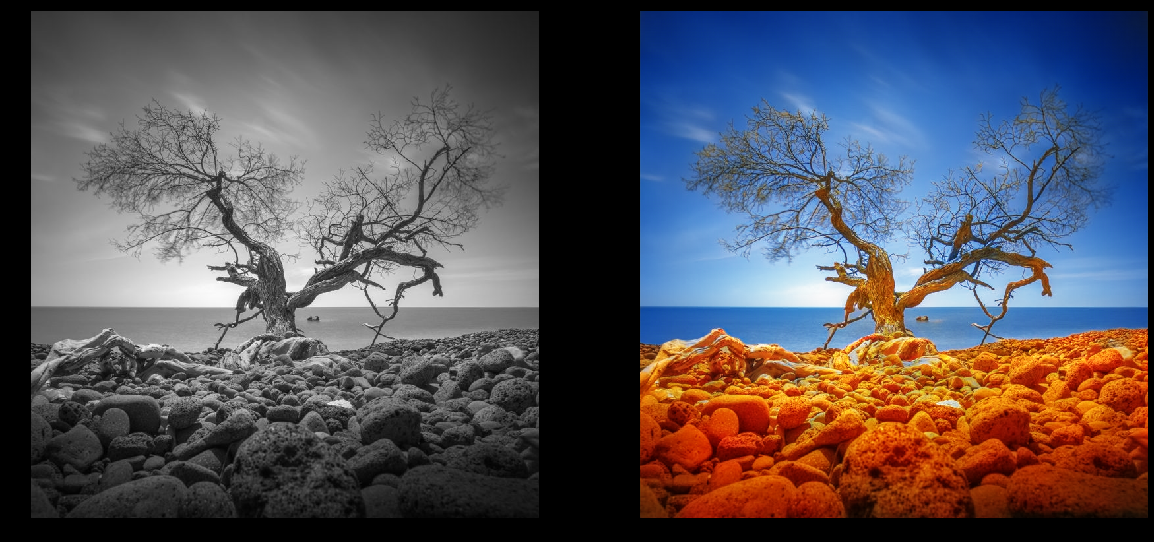

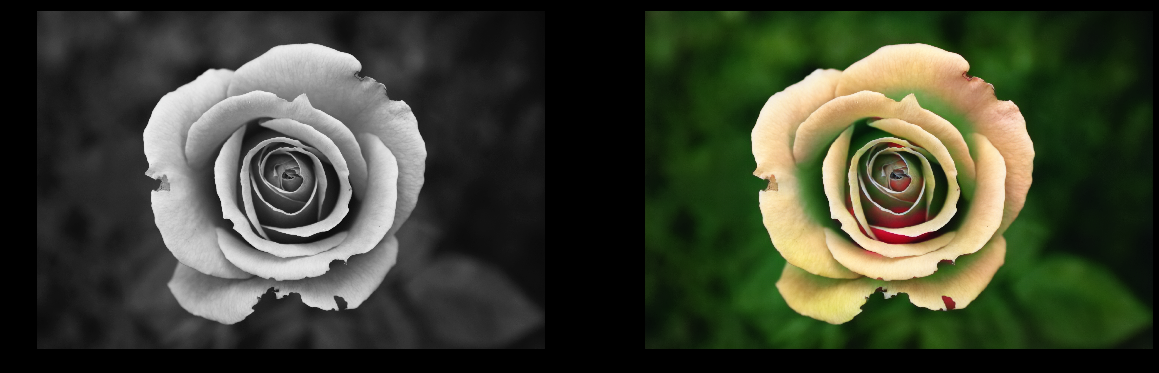

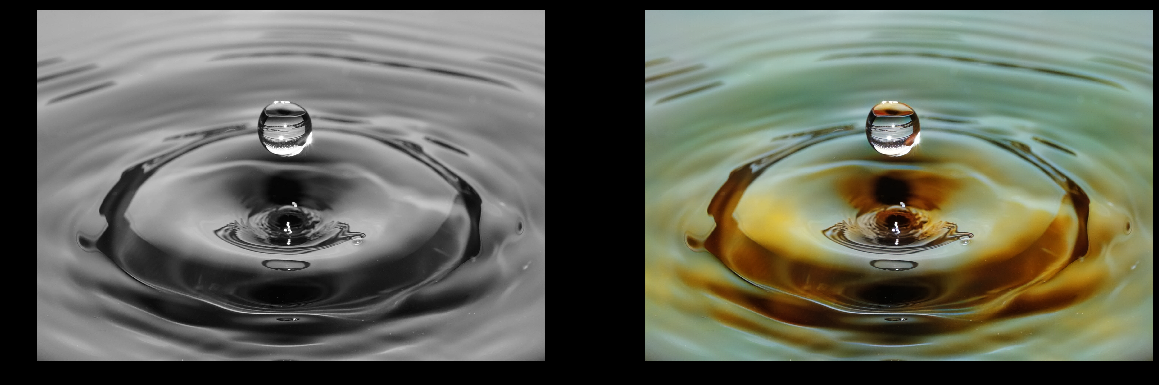

In [26]:
for img in os.listdir("/content/drive/My Drive/deOldifyImages/"):
  img_path = str("/content/drive/My Drive/deOldifyImages/") + img
  if os.path.isfile(img_path):
    vis.plot_transformed_image(img_path)